# Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species 

## Import Modules

In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataset

In [85]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
#delete unnessary columns
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
#basic stats
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocess the data set

In [90]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Analysis

<Axes: >

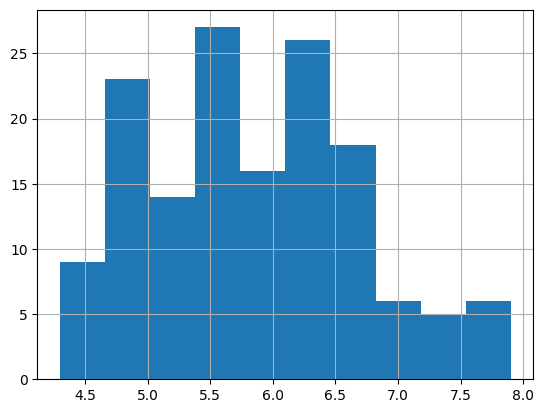

In [91]:
# cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm"]
df["SepalLengthCm"].hist()

<Axes: >

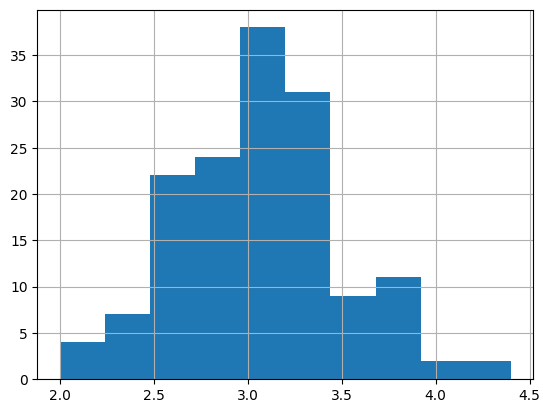

In [92]:
df["SepalWidthCm"].hist()

<Axes: >

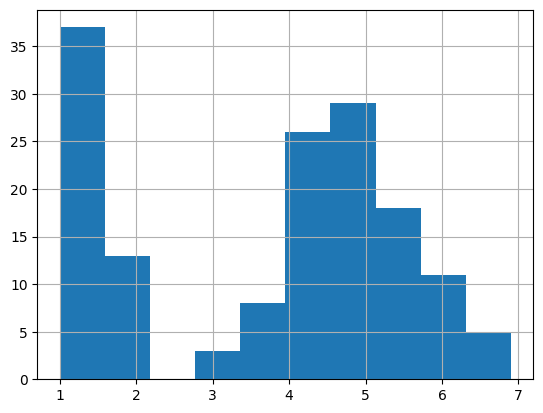

In [93]:
df["PetalLengthCm"].hist()

<Axes: >

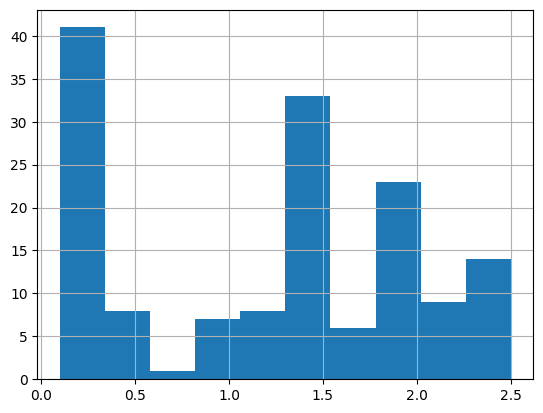

In [94]:
df["PetalWidthCm"].hist()

In [95]:
# scatterplot
colors = ["blue", "red", "green"]
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

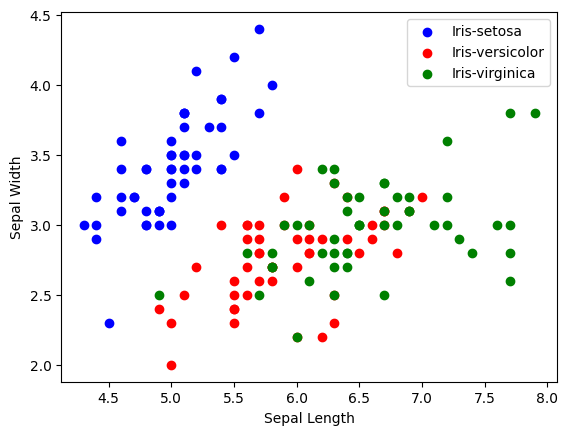

In [96]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

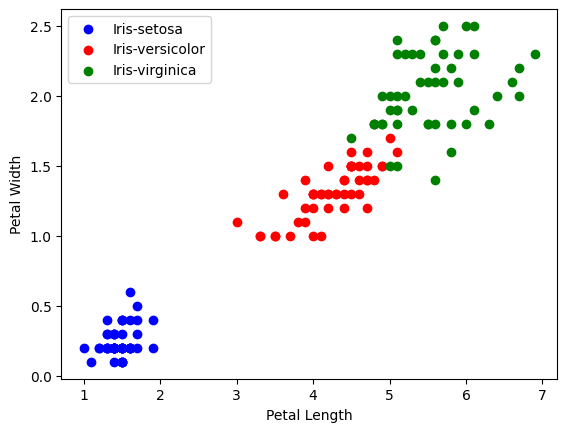

In [97]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

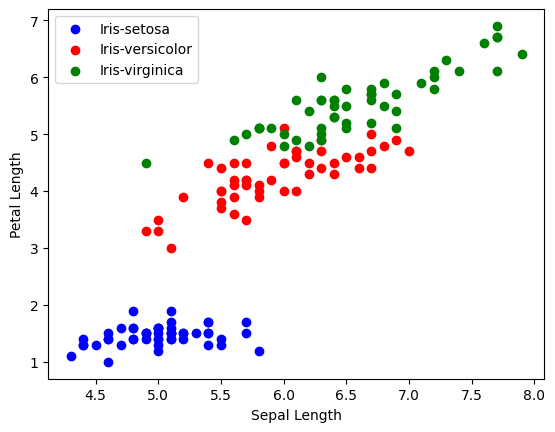

In [98]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

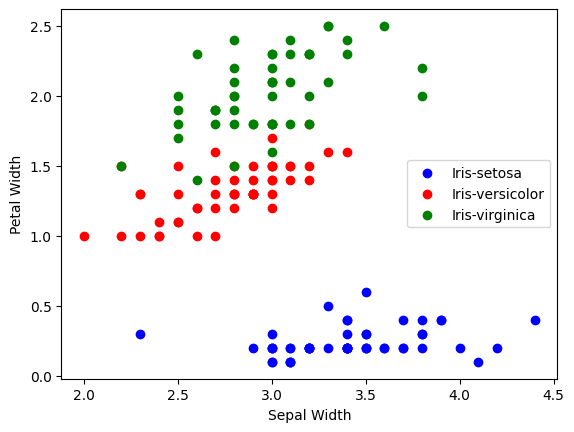

In [99]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## correlation matrix

In [100]:
df2 = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm"]]
df2.corr()
# df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

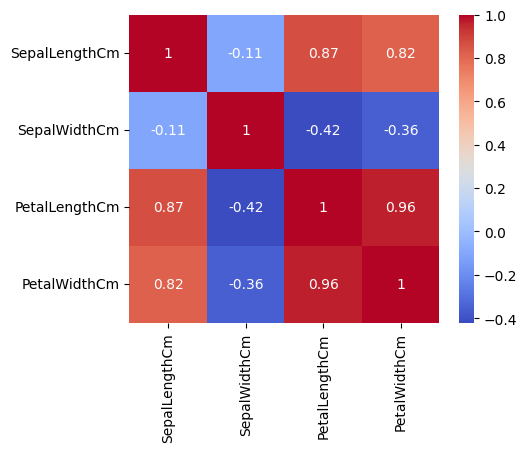

In [101]:
corr = df2.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## label Encoder 

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [103]:
df['Species'] = le.fit_transform(df['Species'])
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## Model Training

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Split the data into training and testing sets
X = df.drop(columns=["Species"])
Y = df["Species"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

def train_and_evaluate_model(model, model_name):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Print the accuracy
    accuracy = model.score(x_test, y_test) * 100
    print(f"{model_name} Accuracy: {accuracy:.2f}%")

# Logistic Regression
logistic_model = LogisticRegression()
train_and_evaluate_model(logistic_model, "Logistic Regression")

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
train_and_evaluate_model(knn_model, "K-Nearest Neighbors")

# Decision Tree
dt_model = DecisionTreeClassifier()
train_and_evaluate_model(dt_model, "Decision Tree")

# Random Forest
rf_model = RandomForestClassifier()
train_and_evaluate_model(rf_model, "Random Forest")

# XGBoost
xgb_model = XGBClassifier()
train_and_evaluate_model(xgb_model, "XGBoost")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 95.56%
K-Nearest Neighbors Accuracy: 95.56%
Decision Tree Accuracy: 95.56%
Random Forest Accuracy: 93.33%
XGBoost Accuracy: 95.56%


## save the model

In [111]:
import pickle

# knn_model is trained model
filename = "/kaggle/working/knn_model.sav"

# Open the file in binary write mode ("wb")
with open(filename, "wb") as file:
    pickle.dump(knn_model, file)

In [112]:
load_model = pickle.load(open(filename, "rb"))

In [113]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
29,4.7,3.2,1.6,0.2
4,5.0,3.6,1.4,0.2
25,5.0,3.0,1.6,0.2
107,7.3,2.9,6.3,1.8
83,6.0,2.7,5.1,1.6


In [108]:
y_test.head()

29     0
4      0
25     0
107    2
83     1
Name: Species, dtype: int64

In [115]:
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
var = load_model.predict([[6.1,3.0,4.6,1.4]])
print(species[var[0]])

Iris-versicolor


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
